<a href="https://colab.research.google.com/github/cbermudez13/eel4815_final_coding_assignment/blob/main/group_1_problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import History 
import numpy as np
from keras.callbacks import EarlyStopping

"""
This is a regression model. 
N is the number of features in each training or testing example. 
K is the number of units in each of the hidden layers. This number need not be fixed for both layers. 

For regression, M=1.  
"""
number_of_feature = 13
number_of_units_in_hidden_layer = 404

#### load the BOSTON regression dataset
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

#### pre-process the data
x_train -= np.mean(x_train)
x_train /= np.std(x_train)

x_test -= np.mean(x_test)
x_test /= np.std(x_test)




In [95]:
#### construct the NN regression model
NN_regression_model = tf.keras.Sequential()
# define layer
hidden_layer_1 = layers.Dense(units=number_of_units_in_hidden_layer, activation='relu')
# add layer to the model
NN_regression_model.add(hidden_layer_1)

# define layer
hidden_layer_2 = layers.Dense(units=number_of_units_in_hidden_layer, activation='relu')
# add layer to the model
NN_regression_model.add(hidden_layer_2)

# define layer
output_layer = layers.Dense(units=1, activation=None)
# add layer to the model
NN_regression_model.add(output_layer)

print("break")

#### specify optimizer - lets use SGD with learning rate of 0.001.
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

#### specify the number of epochs and batch size
epochs = 1000
batch_size = 1

#### compile the model
NN_regression_model.compile(optimizer=optimizer, loss='mse', metrics='mse') # mean absolute error

break


In [96]:
# #### train the whole batch for 1000 epochs
NN_model= NN_regression_model.fit(x_train, y_train, epochs=epochs, batch_size = batch_size, verbose=1,validation_data=(x_test, y_test))
train_error_mse,_ = NN_regression_model.evaluate(x_train, y_train)
test_error_mse ,_ = NN_regression_model.evaluate(x_test, y_test)

print("MSE on training data = {} ; MSE of testing data = {}".format(train_error_mse, test_error_mse))

Epoch 1/1000
404/404 [==============================] - 3s 5ms/step - loss: 82.7754 - mse: 82.7754 - val_loss: 59.9027 - val_mse: 59.9027
Epoch 2/1000
404/404 [==============================] - 2s 5ms/step - loss: 68.8593 - mse: 68.8593 - val_loss: 56.5367 - val_mse: 56.5367
Epoch 3/1000
404/404 [==============================] - 2s 5ms/step - loss: 63.7615 - mse: 63.7615 - val_loss: 67.8158 - val_mse: 67.8158
Epoch 4/1000
404/404 [==============================] - 2s 5ms/step - loss: 62.1743 - mse: 62.1743 - val_loss: 57.9818 - val_mse: 57.9818
Epoch 5/1000
404/404 [==============================] - 2s 5ms/step - loss: 62.5960 - mse: 62.5960 - val_loss: 60.8801 - val_mse: 60.8801
Epoch 6/1000
404/404 [==============================] - 2s 5ms/step - loss: 59.9351 - mse: 59.9351 - val_loss: 52.0558 - val_mse: 52.0558
Epoch 7/1000
404/404 [==============================] - 2s 5ms/step - loss: 59.8843 - mse: 59.8843 - val_loss: 60.3957 - val_mse: 60.3957
Epoch 8/1000
404/404 [============

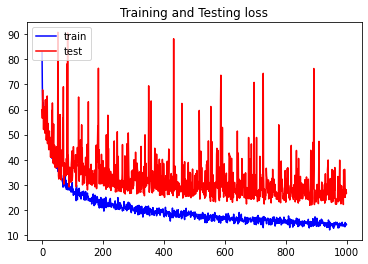

In [98]:
import matplotlib.pyplot as plt

loss = NN_model.history['loss']
mse = NN_model.history['val_loss']

plt.plot(loss,'b', label='Training loss')
plt.plot(mse, 'r' ,label='MSE loss')
plt.title('Training and Testing loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# The errors become significantly different as the number of epochs increases. The overfitting region occurs from epoch 0 to about 100 epochs, where both training and testing errors are the same, so the data is overfitting.